In [74]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [75]:
df=pd.read_excel(r'C:\Users\moonl\OneDrive\Desktop\sar\trial\medset.xlsx')

In [76]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 58 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   name                                                         0 non-null      float64
 1   DOA                                                          49 non-null     object 
 2   treatment                                                    18 non-null     object 
 3   Fever (P/A)                                                  49 non-null     object 
 4   Duration of fever (days)                                     49 non-null     float64
 5   Headache (P/A)                                               49 non-null     object 
 6   Duration of headache                                         8 non-null      float64
 7   Myalgia (P/A)                                                49 non-null     objec

In [77]:
#checking size
df.shape

(57, 58)

In [78]:
df.isna().sum()

name                                                           57
DOA                                                             8
treatment                                                      39
Fever (P/A)                                                     8
Duration of fever (days)                                        8
Headache (P/A)                                                  8
Duration of headache                                           49
Myalgia (P/A)                                                   8
Duration of myalgia                                            47
Cough (P/A)                                                     8
Dyspnea (P/A)                                                   8
Duration of dyspnea                                            43
Vomiting (P/A)                                                  8
Duration of vomiting                                           35
Clinical hematuria  (P/A)                                       8
Duration o

In [79]:
#checking duplicated rows
df.duplicated().sum()

3

In [80]:
#checking descriptive stats
df.describe()

,name,Duration of fever (days),Duration of headache,Duration of myalgia,Duration of vomiting,Duration of hematuria,Duration of edema,duration of abd pain(days)
count,0.0,49.000000,8.00000,10.000000,22.000000,0.0,2.00000,13.000000
mean,NaN,5.428571,3.25000,2.100000,2.227273,NaN,3.50000,2.769231
std,NaN,2.768875,2.12132,1.595131,1.823963,NaN,2.12132,1.640825
min,NaN,2.000000,1.00000,1.000000,1.000000,NaN,2.00000,1.000000
25%,NaN,3.000000,2.00000,1.000000,1.000000,NaN,2.75000,2.000000
50%,NaN,5.000000,2.00000,1.500000,1.500000,NaN,3.50000,2.000000
75%,NaN,7.000000,5.00000,2.000000,2.000000,NaN,4.25000,3.000000
max,NaN,14.000000,7.00000,5.000000,7.000000,NaN,5.00000,7.000000


In [81]:
df.drop('name',axis=1,inplace=True)

In [82]:
df.drop(columns=['DOA','treatment','Duration of hematuria'],axis=1,inplace=True)
df.drop(index=[49,50,51,52,53,54,55,56],inplace=True)

In [83]:
df.head(58)

,Fever (P/A),Duration of fever (days),Headache (P/A),Duration of headache,Myalgia (P/A),Duration of myalgia,Cough (P/A),Dyspnea (P/A),Duration of dyspnea,Vomiting (P/A),...,S. creatinine (mg%),Hematuria (P/N),BACTERIAL CULTURE & S,Urine culture,Dengue Viral Immunoassay (IgM) (Done/ND ),Typhidot / Widal (Done/Not done),Scrub typhus IgM,Malarial parasites (Done/Not done),ELISA for leptospirosis (Done/Not done),Lepto report
0,P,4.0,A,NaN,A,NaN,A,A,NaN,A,...,N,N,negative,ND,negative,ND,not done,ND,ND,NaN
1,P,5.0,A,NaN,A,NaN,A,A,NaN,P,...,N,N,Streptococcal pneumonia,not done,negative,ND,negative,ND,ND,NaN
2,P,12.0,A,NaN,A,NaN,A,A,NaN,A,...,N,N,negative,not done,negative,ND,ND,ND,ND,NaN
3,P,9.0,A,NaN,A,NaN,A,A,NaN,A,...,N,N,negative,not done,negative,ND,negative,negative,ND,NaN
4,P,6.0,A,NaN,A,NaN,A,A,NaN,P,...,N,N,not done,not done,not done,ND,ND,ND,ND,NaN
5,P,6.0,P,2.0,P,2.0,A,A,NaN,A,...,N,N,Salmonella Paratyphi A,not done,negative,ND,ND,ND,ND,NaN
6,P,7.0,A,NaN,A,NaN,A,A,NaN,A,...,N,P,negative,pan sensitive ECOLI,not done,ND,ND,ND,ND,NaN
7,P,12.0,A,NaN,A,NaN,A,A,NaN,A,...,N,N,negative,ESBL ECOLI,not done,ND,negative,negative,ND,NaN
8,P,2.0,P,2.0,P,2.0,P,A,NaN,A,...,N,N,not done,not done,negative,ND,ND,ND,ND,NaN
9,P,13.0,A,NaN,A,NaN,A,A,NaN,A,...,N,N,negative,negative,not done,negative,negative,ND,negative,N


<AxesSubplot:>

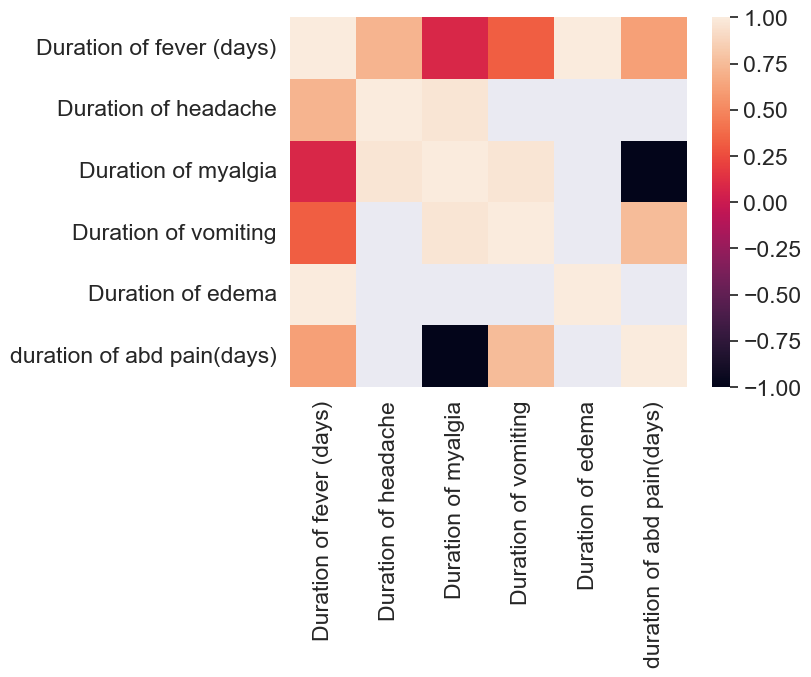

In [84]:
tc=df.corr()
sn.heatmap(tc)

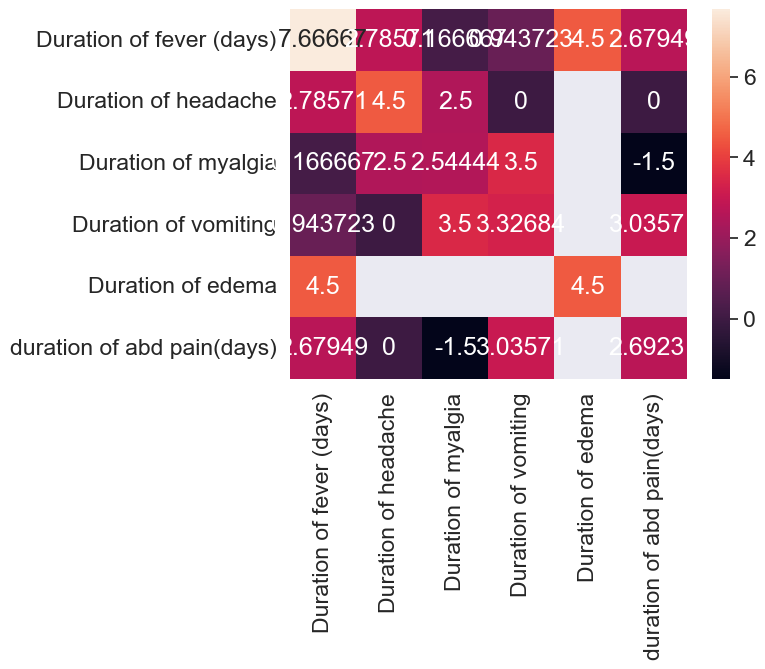

In [85]:
cols = ['Duration of fever (days)', 'Duration of headache', 'Duration of myalgia', 'Duration of vomiting','Duration of edema','duration of abd pain(days)'] 
cov_mat =pd.DataFrame.cov(df)
sn.heatmap(cov_mat, annot=True, fmt='g')
plt.show()

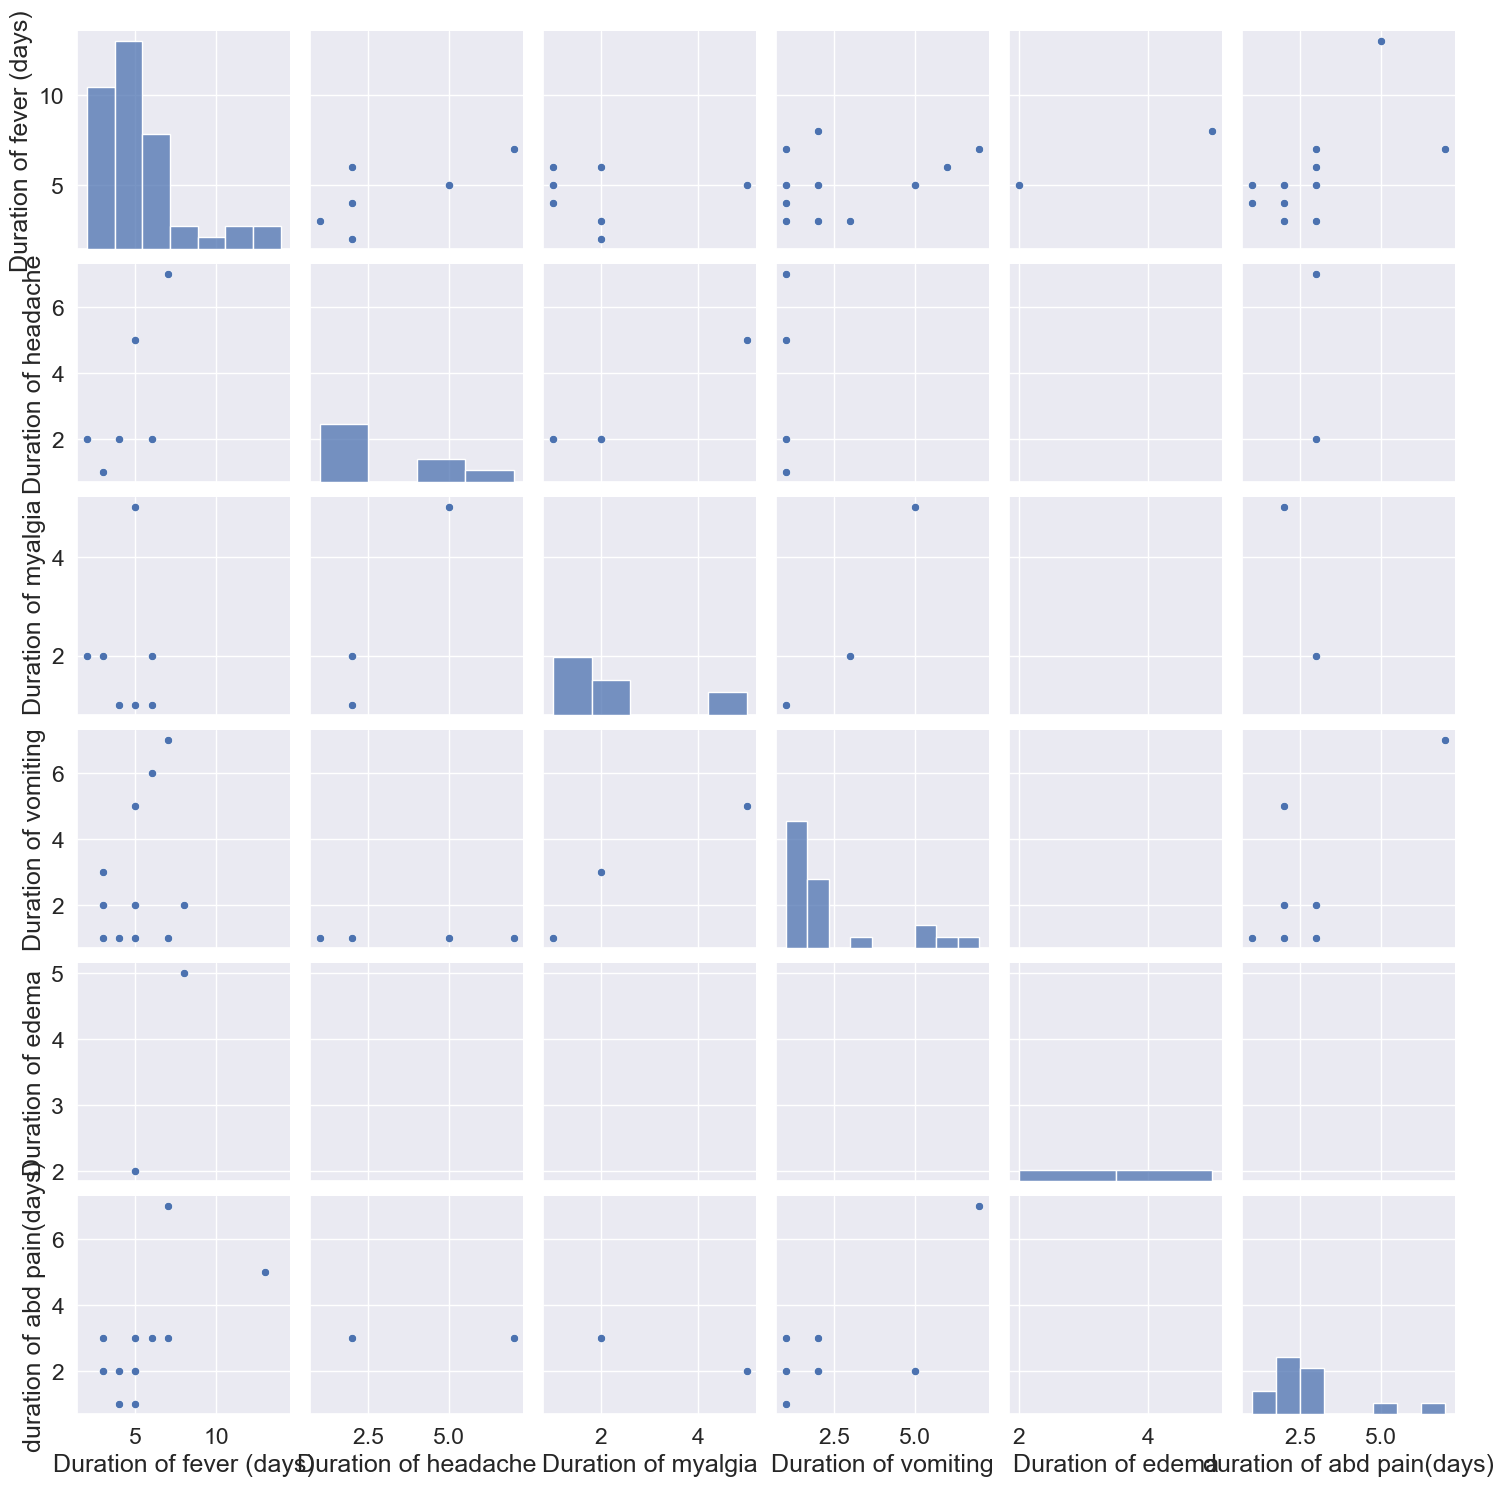

In [86]:
cols = ['Duration of fever (days)', 'Duration of headache', 'Duration of myalgia', 'Duration of vomiting','Duration of edema','duration of abd pain(days)'] 
sn.pairplot(df[cols])

In [ ]:
#testing
df_train, df_test =  df.randomSplit([0.825,0.175], seed = 2020)